## Credit Card Fraud Detection in 2023

#### **Description**:
This [dataset](https://www.kaggle.com/datasets/nelgiriyewithanacredit-card-fraud-detection-dataset-2023) contains credit card transactions made by European cardholders in 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

#### **Key Features**:
* **id**: Unique identifier for each transaction
* **V1-V28**: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
* **Amount**: The transaction amount
* **Class**: Binary label indicating whether the transaction is fraudulent (1) or not (0)

***

### 1. Importing necessary libraries

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# For classification algorithms:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [6]:
cc_data = pd.read_csv('../data/creditcard_2023.csv')
cc_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### 2. Exploratory Data Analysis (EDA)

In [7]:
cc_data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [8]:
print("Credit Card Dataset Information:")
cc_data.info()

Credit Card Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 

Data types are consistent.

In [9]:
# Checking null values
cc_data.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
duplicates = cc_data[cc_data.duplicated()]
if duplicates.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicates)

No duplicate rows found.


Clean dataset: There are no null values, all data types are consistant, and no duplicates were found.

In [11]:
def display_line():
    for i in range(30):
        print("-", end = "")

In [12]:
display_line()
print("\n0 -> Normal Transaction\t1 -> Fraudulent Transaction")
cc_data.Class.value_counts()

------------------------------
0 -> Normal Transaction	1 -> Fraudulent Transaction


Class
0    284315
1    284315
Name: count, dtype: int64

In [13]:
cc_data.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


In [14]:
# Average amount of normal and fraudulent transactions
cc_data.groupby('Class')['Amount'].mean()

Class
0    12026.313506
1    12057.601763
Name: Amount, dtype: float64

blah

### 3. Normalizing Data

In [15]:
normal_transaction = cc_data[cc_data.Class==0]
fraudulent_transaction = cc_data[cc_data.Class==1]
print(normal_transaction.shape,fraudulent_transaction.shape)

(284315, 31) (284315, 31)


### 4. Data Visualization

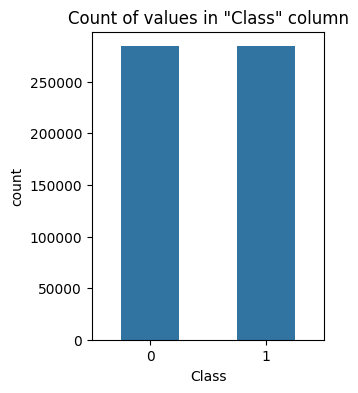

In [17]:
plt.figure(figsize=(3,4))
plt.title('Count of values in "Class" column')
sns.countplot(data=cc_data, x='Class', width=0.5)

plt.savefig('../plots/class_counts.png')

The classes are exactly the same. (I would expect in a realworld example the calsses would be skewed for non fraudtualnt transactions)

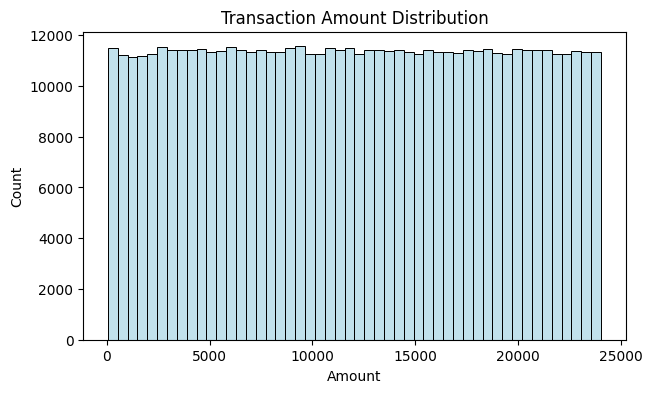

In [18]:
plt.figure(figsize=(7,4))
plt.title('Transaction Amount Distribution')
sns.histplot(data=cc_data, x='Amount', bins=50, color='lightblue')

plt.savefig('../plots/transaction_dist.png')

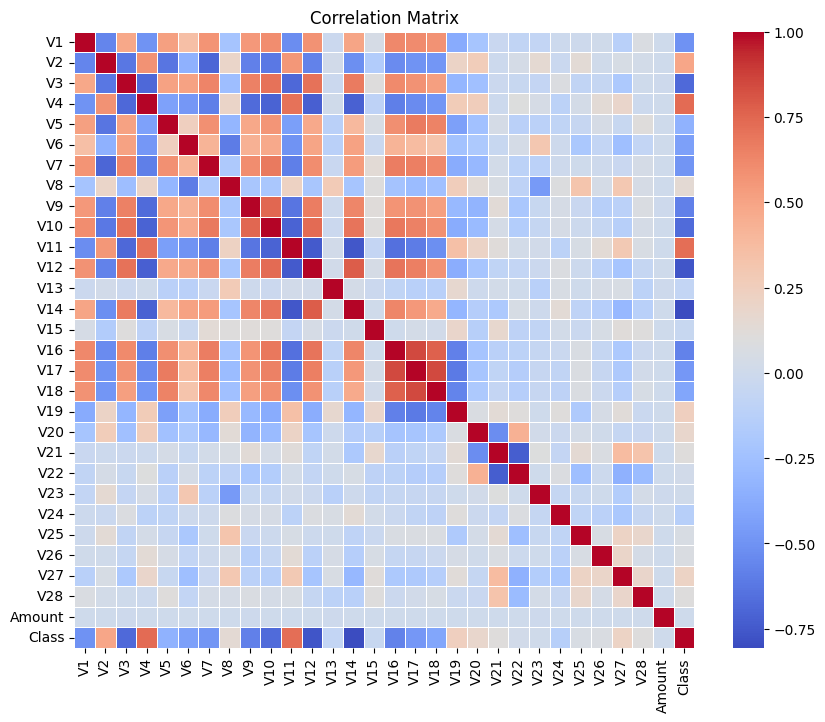

<Figure size 640x480 with 0 Axes>

In [25]:
# Chheking the corrolation matrix and distribution of the amount.
cc_data_without_id = cc_data.drop('id', axis=1) 

# Creating the correlation matrix
corr_matrix = cc_data_without_id.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

plt.savefig('../plots/correlation_matrix.png')

The amounts are pretty flat and the corrolation matrix does not showing any sign of concern over highly corrolated features that needs to be eliminated, V1 to V18 are more corrolated than the rest of the features

### 5. Train-Test Split & Model Selection

In [26]:
features_cc_data = cc_data.drop(['id', 'Class'], axis=1) # Dropping 'id' and 'Class' columns
target_cc_data = cc_data['Class']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_cc_data, target_cc_data, test_size=0.2, random_state=42)

# Checking the shapes of the resulting dataframes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (454904, 29)
Shape of X_test: (113726, 29)
Shape of y_train: (454904,)
Shape of y_test: (113726,)


In [28]:
# Defining models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Neural Network': MLPClassifier(max_iter=150)
}

# Training and evaluating each model
for name, model in models.items():
    if name == 'Neural Network':
        pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
    else:
        pipe = Pipeline([('model', model)])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Print results
    print(f"Results for {name}:")
    print("Confusion Matrix:")
    print(cm)
    print(f"F1 Score: {f_score}")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}\n")

Results for Random Forest:
Confusion Matrix:
[[56735    15]
 [    0 56976]]
F1 Score: 0.99986838295296
Accuracy: 0.9998681040395336
Recall: 1.0

Results for Decision Tree:
Confusion Matrix:
[[56610   140]
 [   61 56915]]
F1 Score: 0.9982373214301375
Accuracy: 0.9982325941297504
Recall: 0.9989293737714126



AttributeError: 'str' object has no attribute 'decode'

Although both models show very good results, the Random Forest model using the default parameters is slightly more accurate than the Decision Tree model:
* The Random Forest model has 14 false positives and 0 false negatives
    * **F1 score: 99.98%**
* The Decision Tree model has 156 false positives and 57 false negatives
    * F1 score: 99.81%

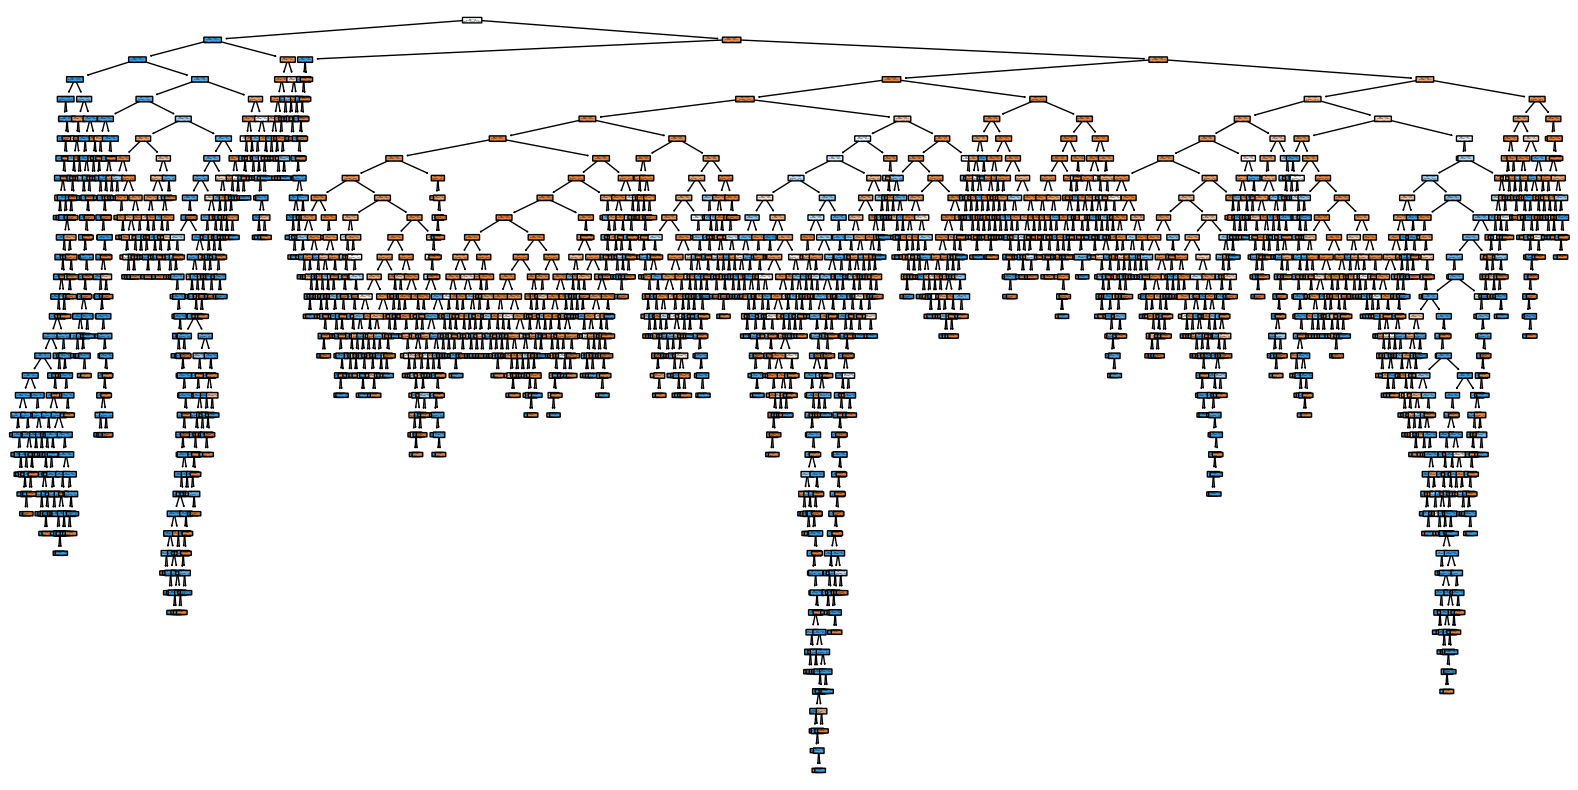

<Figure size 640x480 with 0 Axes>

In [29]:
# Visualizing the random forest model

from sklearn.tree import plot_tree
rf_model = models['Random Forest']
estimator = rf_model.estimators_[0] # Selecting the first estimator from the random forest model
feature_names = X_train.columns

plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=feature_names, filled=True, rounded=True)
plt.show()

plt.savefig('../plots/random_forest.png')